Carregando o conjunto de dados do UCI Machine Learning Repository para realizar uma regressão linear simples para prever o consumo de combustível com base na potência do carro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

In [13]:
# tratando os valores ausentes substituindo pela média da coluna "horsepower"
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

In [14]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [15]:
# usando a relação entre "mpg" (consumo de combustível) e "horsepower" (potência do carro)
x = data['horsepower'].values.reshape(-1, 1)
y = data['mpg'].values

In [16]:
# dividino em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [ ]:
# criando um modelo de regressão linear
model = LinearRegression()
model.fit(x_train, y_train)

In [18]:
# realizando a previsão com os dados de teste
y_pred = model.predict(x_test)

In [19]:
# calculando o erro médio quadrático (Mean Squared Error)e o coeficiente de determinação (R-quared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Erro Médio Quadrático: {mse}')
print(f'Coeficiente de Determinação: {r2}')

Erro Médio Quadrático: 19.151211313552405
Coeficiente de Determinação: 0.6438073642623536


<function matplotlib.pyplot.show(close=None, block=None)>

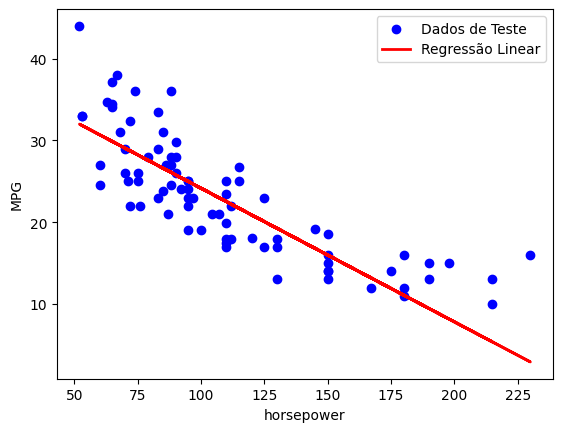

In [22]:
# plotando os dados de teste e a reta de regressão
plt.scatter(x_test, y_test, color='blue', label='Dados de Teste')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show